In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (assuming it's a CSV file)
df = pd.read_csv('/content/Salesdata.csv')

# Check the first few rows of the dataset
print(df.head())

# Convert 'Order Date' and 'Ship Date' columns to datetime objects for time-based analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

   Row ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   32298   CA-2012-124891  31-07-2012  31-07-2012      Same Day    RH-19495   
1   26341    IN-2013-77878  05-02-2013  07-02-2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17-10-2013  18-10-2013   First Class    CR-12730   
3   13524  ES-2013-1579342  28-01-2013  30-01-2013   First Class    KM-16375   
4   47221     SG-2013-4320  05-11-2013  06-11-2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

  Unnamed: 246  Unnamed: 247 Unnamed: 248 Unnamed: 249 Unnamed: 250  \
0        

<ipython-input-47-7e48cf9e56c3>:11: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-47-7e48cf9e56c3>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


#  Total Sales and Trends Over Time

Total Sales: $12642501.91


<ipython-input-48-119c741d2726>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


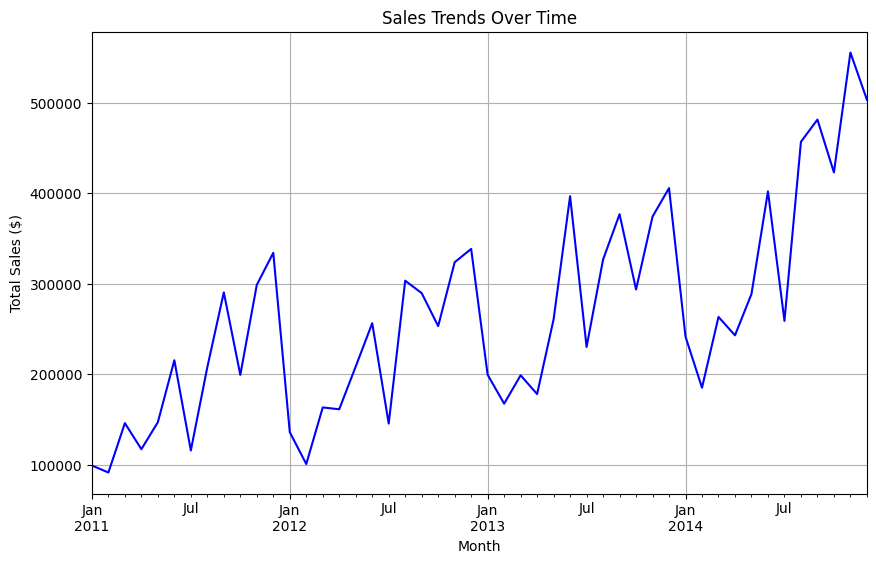

In [48]:
total_sales = df['Sales'].sum()
print(f"Total Sales: ${total_sales:.2f}")

# Resample the sales data by month for trend analysis
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

# Plot the sales trends over time
plt.figure(figsize=(10,6))
monthly_sales.plot(color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()

# Best-Selling Products


Top 10 Best-Selling Products:
Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


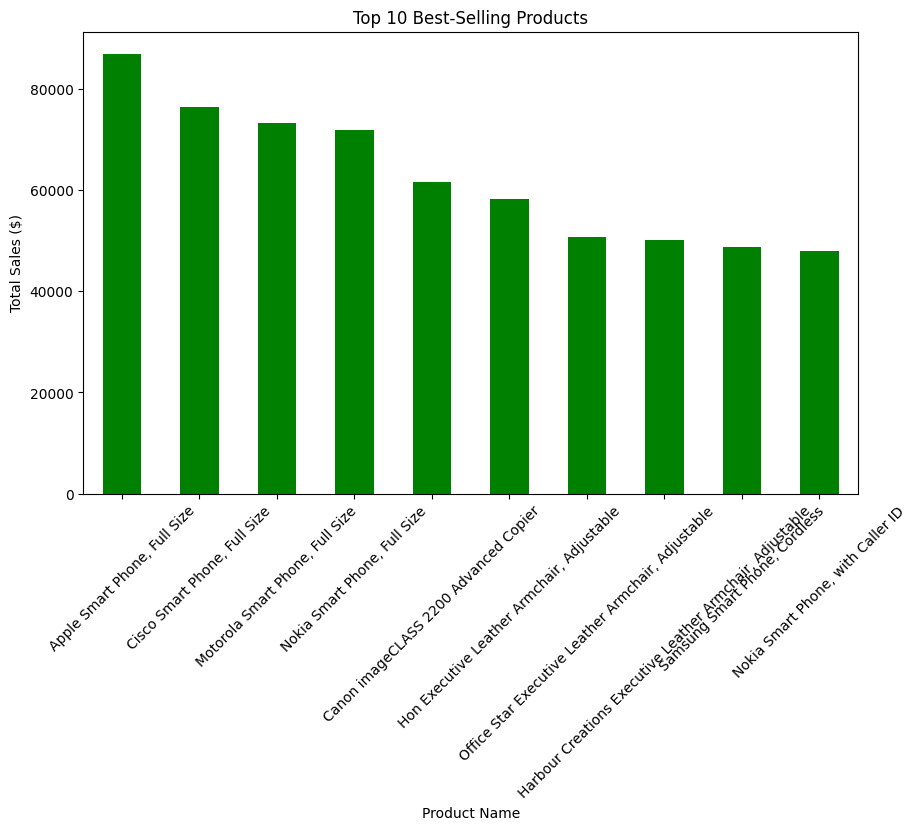

In [49]:
# Group by Product Name and sum the sales, then sort by sales
best_selling_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Top 10 Best-Selling Products
top_10_products = best_selling_products.head(10)
print("\nTop 10 Best-Selling Products:")
print(top_10_products)

# Plot Top 10 Best-Selling Products
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar', color='green')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


# Profitability Analysis


Top 10 Most Profitable Products:
                                                         Sales      Profit
Product Name                                                              
Canon imageCLASS 2200 Advanced Copier               61599.8240  25199.9280
Cisco Smart Phone, Full Size                        76441.5306  17238.5206
Motorola Smart Phone, Full Size                     73156.3030  17027.1130
Hoover Stove, Red                                   31663.7790  11807.9690
Sauder Classic Bookcase, Traditional                39108.3030  10672.0730
Harbour Creations Executive Leather Armchair, A...  50121.5160  10427.3260
Nokia Smart Phone, Full Size                        71904.5555   9938.1955
Cisco Smart Phone, with Caller ID                   43127.5008   9786.6408
Nokia Smart Phone, with Caller ID                   47877.7857   9465.3257
Belkin Router, USB                                  23470.4080   8955.0180


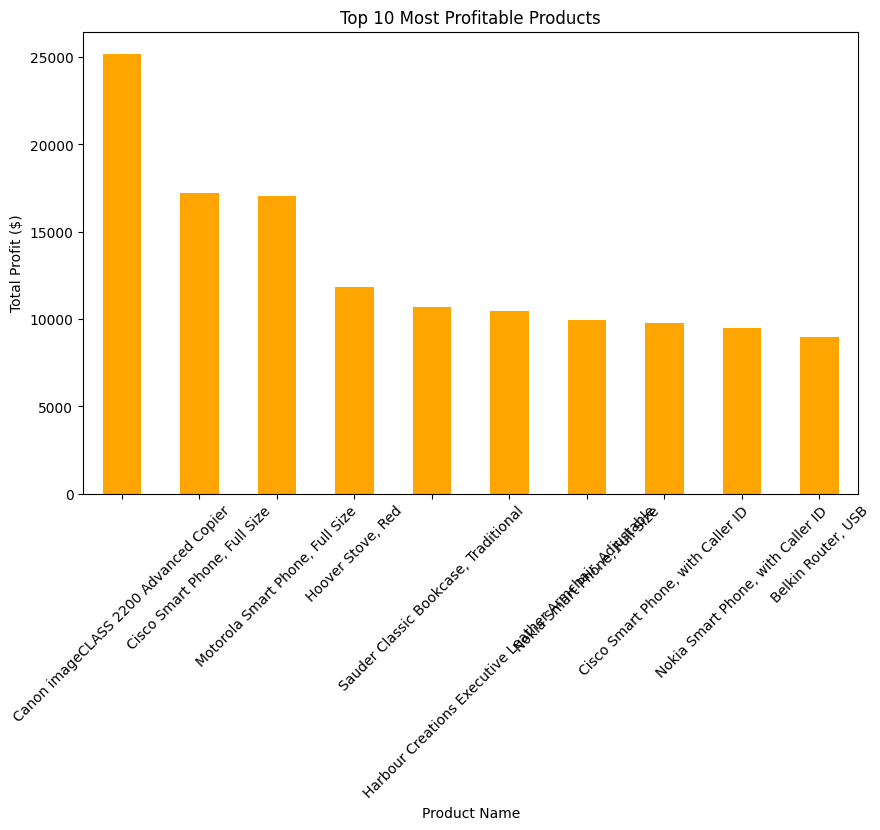

In [50]:
# Group by Product Name and calculate total sales and total profit
profitability = df.groupby('Product Name')[['Sales', 'Profit']].sum()

# Sort products by profit to identify the most profitable products
most_profitable_products = profitability.sort_values(by='Profit', ascending=False).head(10)
print("\nTop 10 Most Profitable Products:")
print(most_profitable_products)

# Plot most profitable products
plt.figure(figsize=(10,6))
most_profitable_products['Profit'].plot(kind='bar', color='orange')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.show()


# Sales by Region


Sales by Region:
Region
Central           2.822303e+06
South             1.600907e+06
North             1.248166e+06
Oceania           1.100185e+06
Southeast Asia    8.844232e+05
North Asia        8.483098e+05
EMEA              8.061613e+05
Africa            7.837732e+05
Central Asia      7.528266e+05
West              7.254578e+05
East              6.787812e+05
Caribbean         3.242809e+05
Canada            6.692817e+04
Name: Sales, dtype: float64


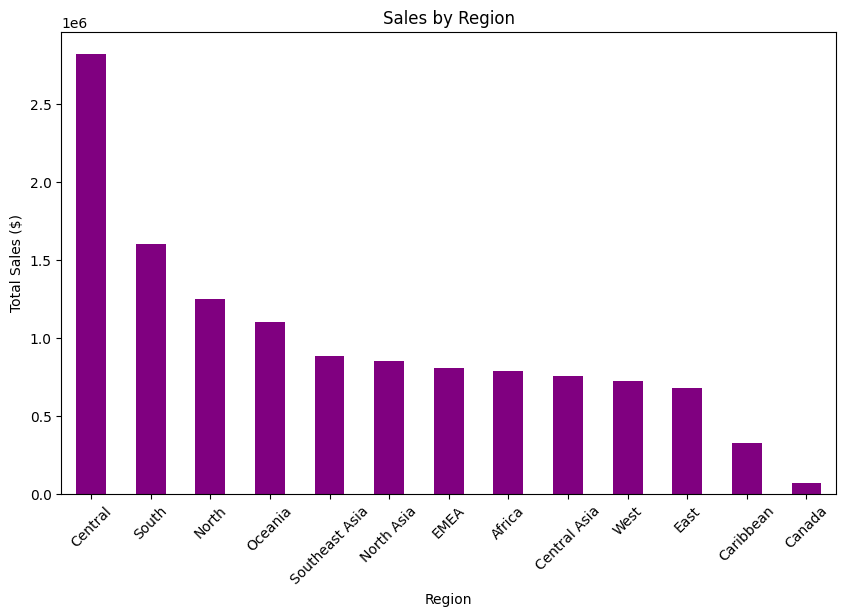

In [51]:
# Group by Region and sum sales
sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Region:")
print(sales_by_region)

# Plot Sales by Region
plt.figure(figsize=(10,6))
sales_by_region.plot(kind='bar', color='purple')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()


# Sales by Customer Segment


Sales by Customer Segment:
Segment
Consumer       6.507949e+06
Corporate      3.824698e+06
Home Office    2.309855e+06
Name: Sales, dtype: float64


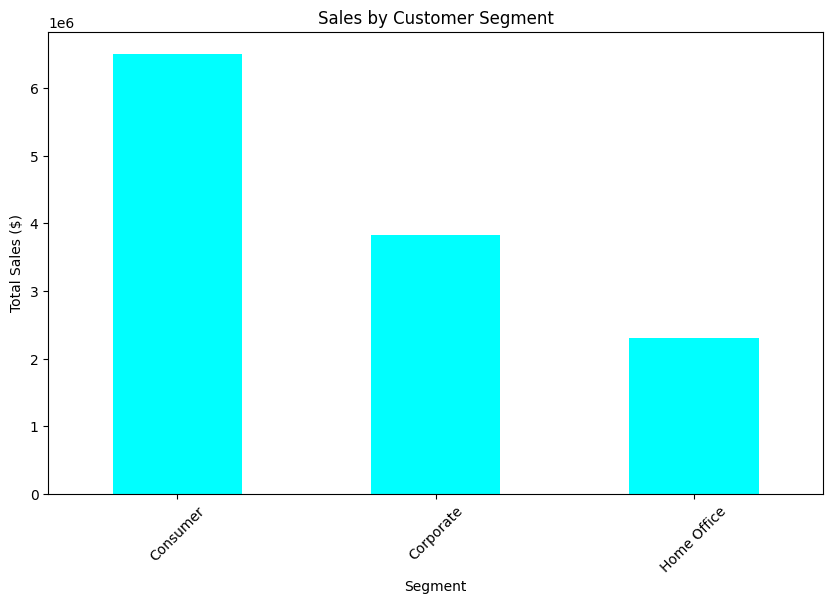

In [52]:
# Group by Segment and sum sales
sales_by_segment = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Customer Segment:")
print(sales_by_segment)

# Plot Sales by Segment
plt.figure(figsize=(10,6))
sales_by_segment.plot(kind='bar', color='cyan')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.show()

# Shipping Mode vs Profitability


Profit by Shipping Mode:
Ship Mode
Standard Class    890596.02120
Second Class      292583.52708
First Class       208104.67520
Same Day           76173.06780
Name: Profit, dtype: float64


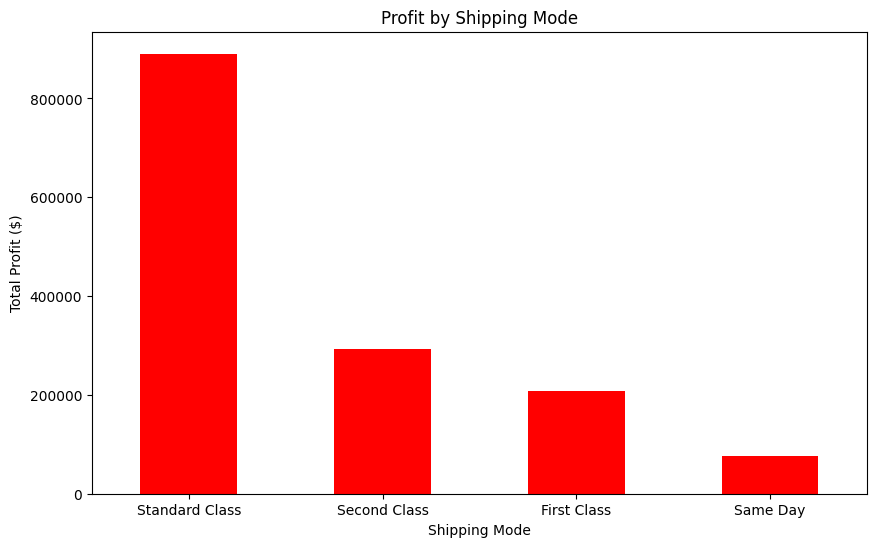

In [53]:
# Group by Ship Mode and sum the profit
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].sum().sort_values(ascending=False)
print("\nProfit by Shipping Mode:")
print(profit_by_ship_mode)

# Plot Profit by Shipping Mode
plt.figure(figsize=(10,6))
profit_by_ship_mode.plot(kind='bar', color='red')
plt.title('Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=0)
plt.show()


# Impact of Discounts on Profitability

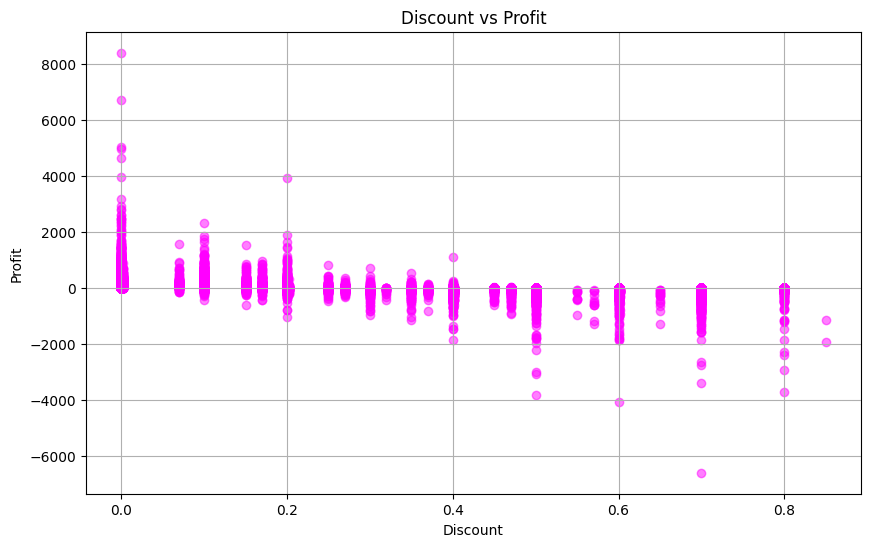

In [64]:
# Scatter plot of Discount vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.5, color='magenta')
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)

